x
[[    22   1558]
 [    12  40261]
 [    22   1721]
 [    23    351]
 [    16  23564]
 [    23   1162]
 [    22   3540]
 [    23    641]
 [    20  10365]
 [    19  15906]
 [    23      6]
 [    22   4461]
 [    23    118]
 [    23    160]
 [    21   8156]
 [    18  17774]
 [    16  24332]
 [    21   6010]
 [    18  16480]
 [    23   1116]
 [    23    974]
 [    17  20232]
 [    23    649]
 [    21   5751]
 [     8  55244]
 [    16  25454]
 [    23     55]
 [    23     57]
 [    20  10887]
 [    22   3561]
 [    20  10499]
 [    20   9163]
 [    15  30190]
 [    22   3524]
 [    23      0]
 [    22   2935]
 [    22   4666]
 [    22   2405]
 [    23    861]
 [    21   6483]
 [    15  27275]
 [    22   4271]
 [    23    440]
 [    23    258]
 [    22   1663]
 [    22   2187]
 [    20  10972]
 [    19  14835]
 [    23    502]
 [    21   7033]
 [    23     34]
 [    14  33379]
 [    21   6411]
 [    14  31535]
 [    21   6124]
 [    22   2027]
 [    23    168]
 [    23   1136]
 [    20   9

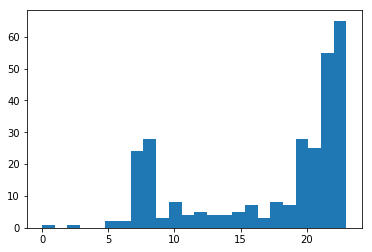

In [1]:
import numpy as np
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt
 
 
mac2id=dict()
onlinetimes=[]
f=open('./testData/TestData.txt')
for line in f:
    mac=line.split(',')[2]
    onlinetime=int(line.split(',')[6])
    starttime=int(line.split(',')[4].split(' ')[1].split(':')[0])
    if mac not in mac2id:
        mac2id[mac]=len(onlinetimes)
        onlinetimes.append((starttime,onlinetime))
    else:
        onlinetimes[mac2id[mac]]=[(starttime,onlinetime)]
real_X=np.array(onlinetimes).reshape((-1,2))
 
X=real_X[:,0:1]
print('x')
print(real_X)
db=skc.DBSCAN(eps=0.01,min_samples=20).fit(X)
labels = db.labels_
 
print('Labels:')
print(labels)
raito=len(labels[labels[:] == -1]) / len(labels)
print('Noise raito:',format(raito, '.2%'))
 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
 
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))
 
for i in range(n_clusters_):
    print('Cluster ',i,':')
    print(list(X[labels == i].flatten()))
     
plt.hist(X,24)
plt.show()